Desde la terminal:

```bash
pip install -r requirements.txt
````

## EJEMPLO DE VAE

In [1]:
from keras.datasets import mnist
from rapidae.models import VAE
from rapidae.models.base import VAE_Encoder_Conv_MNIST, VAE_Decoder_Conv_MNIST
from rapidae.pipelines import TrainingPipeline
from rapidae.evaluate import plot_latent_space, plot_reconstructions

2024-10-05 17:48:32.503204: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-05 17:48:32.646934: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-05 17:48:32.704621: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-05 17:48:32.721695: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-05 17:48:32.835366: I tensorflow/core/platform/cpu_feature_guar

### Datos

Descargar y preprocesar el conjunto de datos. En este ejemplo, el conjunto de datos seleccionado es el conocido MNIST, compuesto por imágenes de dígitos manuscritos.

In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize data
x_train = x_train[..., None].astype('float32') / 255
x_test = x_test[..., None].astype('float32') / 255

print("Data shape:", x_train.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Data shape: (60000, 28, 28, 1)


### Modelo

En este ejemplo, el modelo es el mismo que el utilizado en el [tutorial de keras](https://keras.io/examples/generative/vae/#build-the-encoder)

In [3]:
input_dim = x_train.shape[1:]

# Creación del modelo
model = VAE(input_dim=input_dim,
            latent_dim=2,
            encoder=VAE_Encoder_Conv_MNIST(input_dim=input_dim, latent_dim=2),
            decoder=VAE_Decoder_Conv_MNIST(input_dim=input_dim, latent_dim=2))

2024-10-05 17:01:35 [INFO]: Using provided encoder
2024-10-05 17:01:35 [INFO]: Using provided decoder
2024-10-05 17:01:35 [INFO]: No specific downstream task has been selected
2024-10-05 17:01:35 [INFO]: Using binary_crossentropy as the reconstruction loss function


### Entrenamiento

In [5]:
pipe = TrainingPipeline(name='VAE_MNIST',
                        learning_rate=0.001,
                        model=model,
                        num_epochs=30,
                        batch_size=128)

trained_model = pipe(x=x_train)

2024-09-17 09:57:14 [INFO]: +++ VAE_MNIST +++
2024-09-17 09:57:14 [INFO]: Creating folder in ./output_dir/VAE_MNIST_2024-09-17_09-57
2024-09-17 09:57:14 [INFO]: 
TRAINING STARTED
	Backend: tensorflow
	Eager mode: False
	Validation data available: False
	Callbacks set: ['EarlyStopping', 'ModelCheckpoint'] 



Epoch 1/30


I0000 00:00:1726567037.569309    3098 service.cc:146] XLA service 0x7f335c012930 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726567037.569634    3098 service.cc:154]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2024-09-17 09:57:17.683075: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-17 09:57:18.148917: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8902
I0000 00:00:1726567041.530953    3098 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 1: loss improved from inf to 214.23824, saving model to ./output_dir/VAE_MNIST_2024-09-17_09-57/model.weights.h5
469/469 - 12s - 25ms/step - kl_loss: 2.7980 - loss: 214.2382 - reconstruction_loss: 211.4281
Epoch 2/30

Epoch 2: loss improved from 214.23824 to 178.45479, saving model to ./output_dir/VAE_MNIST_2024-09-17_09-57/model.weights.h5
469/469 - 2s - 5ms/step - kl_loss: 5.2001 - loss: 178.4548 - reconstruction_loss: 173.2533
Epoch 3/30

Epoch 3: loss improved from 178.45479 to 168.15848, saving model to ./output_dir/VAE_MNIST_2024-09-17_09-57/model.weights.h5
469/469 - 2s - 5ms/step - kl_loss: 5.6011 - loss: 168.1585 - reconstruction_loss: 162.5582
Epoch 4/30

Epoch 4: loss improved from 168.15848 to 163.09035, saving model to ./output_dir/VAE_MNIST_2024-09-17_09-57/model.weights.h5
469/469 - 2s - 5ms/step - kl_loss: 5.9201 - loss: 163.0903 - reconstruction_loss: 157.1664
Epoch 5/30

Epoch 5: loss improved from 163.09035 to 160.48196, saving model to ./output_dir/VAE_MNIST_

2024-09-17 09:58:37 [INFO]: Restoring best model
2024-09-17 09:58:37 [INFO]: Best model restored


### Evaluación

In [6]:
outputs = trained_model.predict(x_test)
print("Ouput keys:", outputs.keys())

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Ouput keys: dict_keys(['z', 'z_mean', 'z_log_var', 'x_recon'])


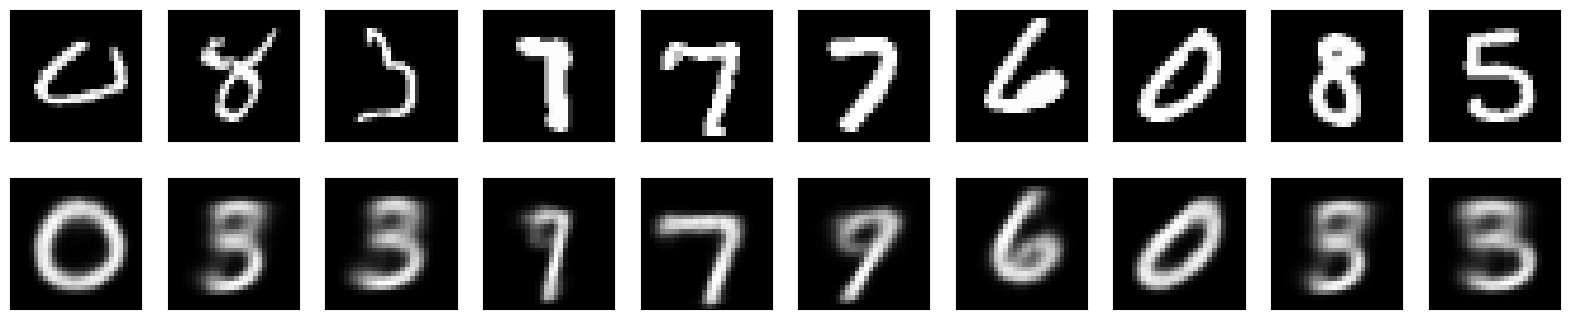

In [7]:
plot_reconstructions(x_test, outputs['x_recon'])

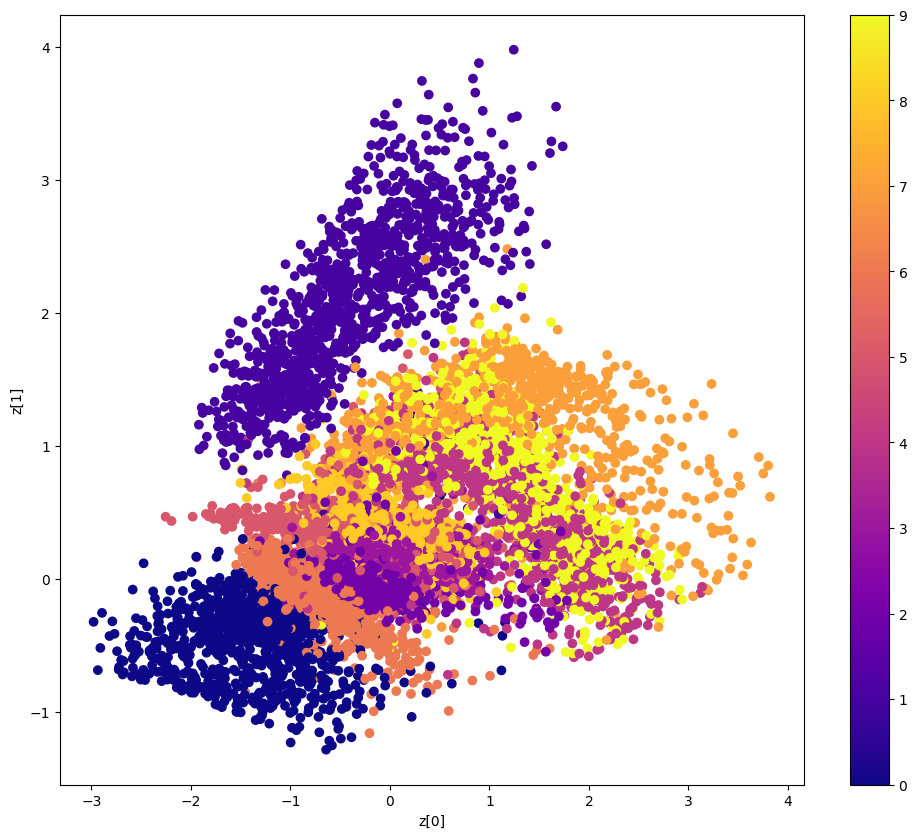

In [9]:
plot_latent_space(outputs['z'], y_test)

## CLASIFICACIÓN DE FIBRILACIÓN ARTICULAR CON UN VAE

In [20]:
import numpy as np
from keras import utils
from rapidae.data import load_dataset
from rapidae.models import RVAE
from rapidae.models.rvae import Encoder, Decoder
from rapidae.pipelines import TrainingPipeline
from rapidae.evaluate import plot_latent_space, plot_reconstructions

### Datos

In [21]:
data = load_dataset("AtrialFibrillation")

x_train, y_train_orig = data["x_train"], data["y_train"]
x_val, y_val_orig = data["x_val"], data["y_val"]
x_test, y_test_orig = data["x_test"], data["y_test"]

# Obtain number of clasess
n_classes = len(np.unique(y_train_orig))

# Convert labels to categorical
y_train = utils.to_categorical(y_train_orig, n_classes)
y_val = utils.to_categorical(y_val_orig, n_classes)
y_test = utils.to_categorical(y_test_orig, n_classes)

2024-09-17 10:06:23 [INFO]: Downloading arrhythmia_data.npy...
2024-09-17 10:06:23 [INFO]: Deleting data...


### Modelo

In [26]:
timesteps = x_train.shape[1]
num_features = x_train.shape[2]

model = RVAE((timesteps, num_features))

2024-09-17 10:08:26 [INFO]: Trying to set encoder and decoder from child class...
2024-09-17 10:08:26 [INFO]: Encoder set from rvae
2024-09-17 10:08:26 [INFO]: Decoder set from rvae


### Entrenamiento

In [27]:
epochs = 30
batch_size = 128

pipe = TrainingPipeline(name='RVAE_AtrialFibrillation', 
                        learning_rate=0.001,
                        model=model, 
                        num_epochs=epochs, 
                        batch_size=batch_size)

trained_model = pipe(x=x_train, y=y_train, x_val=x_val, y_val=y_val)

2024-09-17 10:08:30 [INFO]: +++ RVAE_AtrialFibrillation +++
2024-09-17 10:08:30 [INFO]: Creating folder in ./output_dir/RVAE_AtrialFibrillation_2024-09-17_10-08
2024-09-17 10:08:30 [INFO]: 
TRAINING STARTED
	Backend: tensorflow
	Eager mode: False
	Validation data available: True
	Callbacks set: ['EarlyStopping', 'ModelCheckpoint'] 



Epoch 1/30

Epoch 1: val_loss improved from inf to 365.81436, saving model to ./output_dir/RVAE_AtrialFibrillation_2024-09-17_10-08/model.weights.h5
315/315 - 25s - 80ms/step - clf_loss: 253.1794 - kl_loss: 12.8696 - loss: 565.6694 - reconstruction_loss: 299.6200 - val_clf_loss: 154.2234 - val_kl_loss: 14.1000 - val_loss: 365.8144 - val_reconstruction_loss: 197.4910
Epoch 2/30

Epoch 2: val_loss improved from 365.81436 to 349.14804, saving model to ./output_dir/RVAE_AtrialFibrillation_2024-09-17_10-08/model.weights.h5
315/315 - 18s - 58ms/step - clf_loss: 152.6682 - kl_loss: 11.0845 - loss: 350.8283 - reconstruction_loss: 187.0757 - val_clf_loss: 146.3915 - val_kl_loss: 10.3862 - val_loss: 349.1480 - val_reconstruction_loss: 192.3702
Epoch 3/30

Epoch 3: val_loss improved from 349.14804 to 293.33792, saving model to ./output_dir/RVAE_AtrialFibrillation_2024-09-17_10-08/model.weights.h5
315/315 - 18s - 58ms/step - clf_loss: 136.2933 - kl_loss: 9.1638 - loss: 309.4477 - reconstruction_lo

2024-09-17 10:13:47 [INFO]: Restoring best model
2024-09-17 10:13:47 [INFO]: Best model restored


### Evaluación

In [28]:
outputs = trained_model.predict(x_test)
print("Ouput keys:", outputs.keys())

420/420 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step
Ouput keys: dict_keys(['z', 'z_mean', 'z_log_var', 'x_recon', 'clf'])


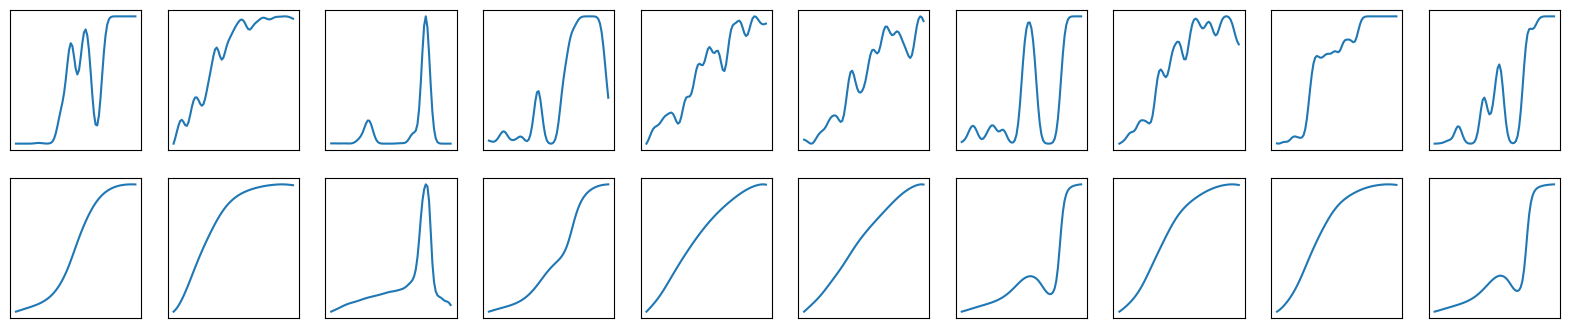

In [29]:
plot_reconstructions(x_test, outputs['x_recon'], type="ts")

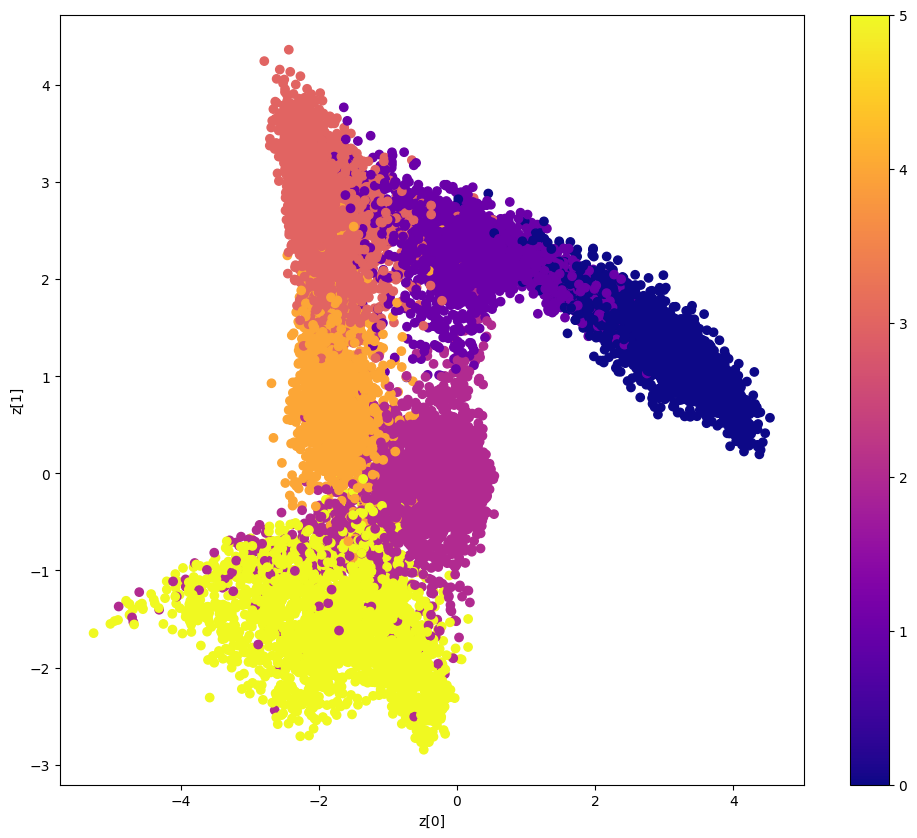

In [30]:
plot_latent_space(outputs['z'], data["y_test"])

In [31]:
from rapidae.evaluate import evaluate
from sklearn.metrics import accuracy_score

outputs_test = trained_model.predict(x_test)

evaluate(y_true=y_test_orig,
         y_hat=np.argmax(outputs_test['clf'], axis=1),
         sel_metric=accuracy_score)

420/420 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


2024-09-17 10:23:11 [INFO]: Using Scikit-learn metric...


test set results: [
	 accuracy_score: 0.9105654761904762 
]


0.9105654761904762

## EJERCICIO - ESTIMACIÓN DE VIDA ÚTIL (RUL ESTIMATION) DE MOTORES DE AVIACIÓN

In [2]:
import numpy as np
from rapidae.data import load_CMAPSS, CMAPSS_preprocessor
from rapidae.models.rvae import Encoder
from rapidae.pipelines import PreprocessPipeline, TrainingPipeline
from rapidae.evaluate import evaluate, cmapps_score, plot_latent_space
from sklearn.metrics import mean_squared_error

### Datos

In [3]:
# el dataset original tiene 4 subsets, este es uno de ellos
subset = 'FD004'
# estos son datos de sensores de los aviones
sensors = ['s_3', 's_4', 's_7', 's_10', 's_11', 's_12']
# se aplica una ventana deslizante sobre los datos, en este caso de tamaño "sequence_length"
sequence_length = 30
# intensidad del suavizado de las series
alpha = 0.1
# los valores de RUL por encima de 125 se omiten
threshold = 125

In [4]:
data = load_CMAPSS(subset)

preprocess_pipeline = PreprocessPipeline(name='CMAPPS_preprocessing',
                                         preprocessor=CMAPSS_preprocessor)

data = preprocess_pipeline(train=data["x_train"],
                           test=data["x_test"],
                           y_test=data["y_test"],
                           sensors=sensors,
                           sequence_length=sequence_length,
                           alpha=alpha,
                           threshold=threshold)

2024-10-05 17:49:09 [INFO]: Selected preprocessor is a function.


### MODELO

In [5]:
timesteps = data["x_train"].shape[1]
input_dim = data["x_train"].shape[2]
intermediate_dim = 300
batch_size = 128
latent_dim = 2

In [13]:
from typing import Tuple, Union
from keras import metrics, ops, losses, layers
from rapidae.models.base import BaseAE
from rapidae.models.distributions import Normal
from keras import Sequential


class RULVAE(BaseAE):
    """
    VAE para predecir la RUL de motores de aviación

    Args:
        input_dim (Union[Tuple[int, ...], None]): Dimensionalidad de los datos.
        latent_dim (int): Dimensionalidad del espacio latente.
        encoder (BaseEncoder): An instancia de un encoder.
    """

    def __init__(
        self,
        input_dim: Union[Tuple[int, ...], None] = None,
        latent_dim: int = 2,
        encoder: callable = None,
    ):
        BaseAE.__init__(
            self,
            input_dim,
            latent_dim,
            encoder=encoder,
        )

        self.sampling = Normal() # necesario para samplear del espacio latente

        # TO-DO: CREAR UN REGRESOR SIMPLE CON DOS CAPAS DENSAS
        # una con 200 neuronas y activación tahn y otra con 1 neurona para predecir la RUL
        self.regressor = None

        # trackers
        self.reg_loss_tracker = metrics.Mean(name="reg_loss")
        self.kl_loss_tracker = metrics.Mean(name="kl_loss")

    # Forward pass
    def call(self, x):
        z_mean, z_log_var = self.encoder(x)
        z_std = ops.exp(0.5 * z_log_var)
        z = self.sampling([z_mean, z_std])
        outputs = {}
        outputs["z"] = z
        outputs["z_mean"] = z_mean
        outputs["z_log_var"] = z_log_var
        reg_prediction = self.regressor(z)
        outputs["reg"] = reg_prediction

        return outputs

    # Función de error
    def compute_loss(self, x=None, y=None, y_pred=None, sample_weight=None):
        # KL loss
        kl_loss = -0.5 * (
            1
            + y_pred["z_log_var"]
            - ops.square(y_pred["z_mean"])
            - ops.exp(y_pred["z_log_var"])
        )
        kl_loss = ops.mean(ops.sum(kl_loss, axis=1))
        self.kl_loss_tracker.update_state(kl_loss)

        # TO-DO: AÑADIR EL ERROR DEL REGRESOR

        return kl_loss + reg_loss

In [14]:
model = RULVAE(input_dim=(timesteps, input_dim), latent_dim=2, encoder=Encoder)

2024-10-05 17:57:25 [INFO]: Using provided encoder
2024-10-05 17:57:25 [INFO]: Encoder is a class, initializing...


### Entrenamiento

In [15]:
epochs = 10000 # realmente no importa, se utiliza early stopping
optimizer = 'adam'
pipeline = TrainingPipeline(name='RUL_VAE',
                            model=model,
                            num_epochs=epochs,
                            batch_size=batch_size,
                            optimizer='adam',
                            learning_rate=0.01
                            )

trained_model = pipeline(x=data["x_train"], y=data["y_train"], x_val=data["x_val"], y_val=data["y_val"])

2024-10-05 17:57:27 [INFO]: +++ RUL_VAE +++
2024-10-05 17:57:27 [INFO]: Creating folder in ./output_dir/RUL_VAE_2024-10-05_17-57
2024-10-05 17:57:27 [INFO]: 
TRAINING STARTED
	Backend: tensorflow
	Eager mode: False
	Validation data available: True
	Callbacks set: ['EarlyStopping', 'ModelCheckpoint'] 



Epoch 1/10000


2024-10-05 17:57:31.965514: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8902



Epoch 1: val_loss improved from inf to 426.88553, saving model to ./output_dir/RUL_VAE_2024-10-05_17-57/model.weights.h5
341/341 - 11s - 31ms/step - kl_loss: 26.4138 - loss: 963.6689 - reg_loss: 935.9349 - val_kl_loss: 10.2324 - val_loss: 426.8855 - val_reg_loss: 414.2370
Epoch 2/10000

Epoch 2: val_loss improved from 426.88553 to 351.80789, saving model to ./output_dir/RUL_VAE_2024-10-05_17-57/model.weights.h5
341/341 - 5s - 14ms/step - kl_loss: 19.2158 - loss: 328.2927 - reg_loss: 308.3476 - val_kl_loss: 12.1301 - val_loss: 351.8079 - val_reg_loss: 337.3490
Epoch 3/10000

Epoch 3: val_loss did not improve from 351.80789
341/341 - 5s - 14ms/step - kl_loss: 11.0743 - loss: 235.6638 - reg_loss: 223.9831 - val_kl_loss: 10.0288 - val_loss: 359.8141 - val_reg_loss: 346.7209
Epoch 4/10000

Epoch 4: val_loss improved from 351.80789 to 322.13501, saving model to ./output_dir/RUL_VAE_2024-10-05_17-57/model.weights.h5
341/341 - 5s - 14ms/step - kl_loss: 10.9928 - loss: 226.9237 - reg_loss: 215

2024-10-05 17:58:49 [INFO]: Restoring best model
2024-10-05 17:58:49 [INFO]: Best model restored


### Evaluación

In [16]:
outputs = trained_model.predict(data["x_test"])

# al modelo sólo se le pasaron valores de RUL inferiores al umbral, por tanto obviar las superiores
y_test = data["y_test"].clip(upper=threshold)

print("RMSE:", mean_squared_error(np.expand_dims(y_test, axis=-1), outputs['reg'], squared=False))
evaluate(y_true=np.expand_dims(y_test, axis=-1),
         y_hat=outputs['reg'], sel_metric=cmapps_score.CMAPSS_Score())

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


2024-10-05 17:59:22 [INFO]: Using Rapidae custom metric...


RMSE: 15.933991276809182
test set results: [
	 CMAPSS_Score: 1255.0801691925296 
]


array(1255.08016919)

  25/1361 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step  

1361/1361 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


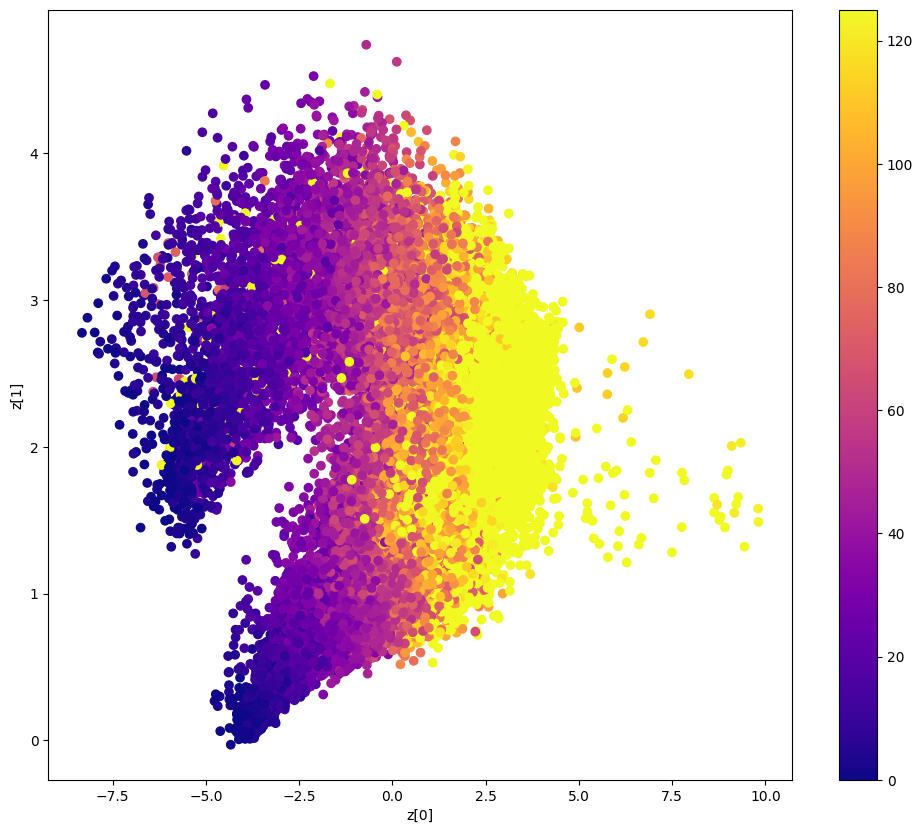

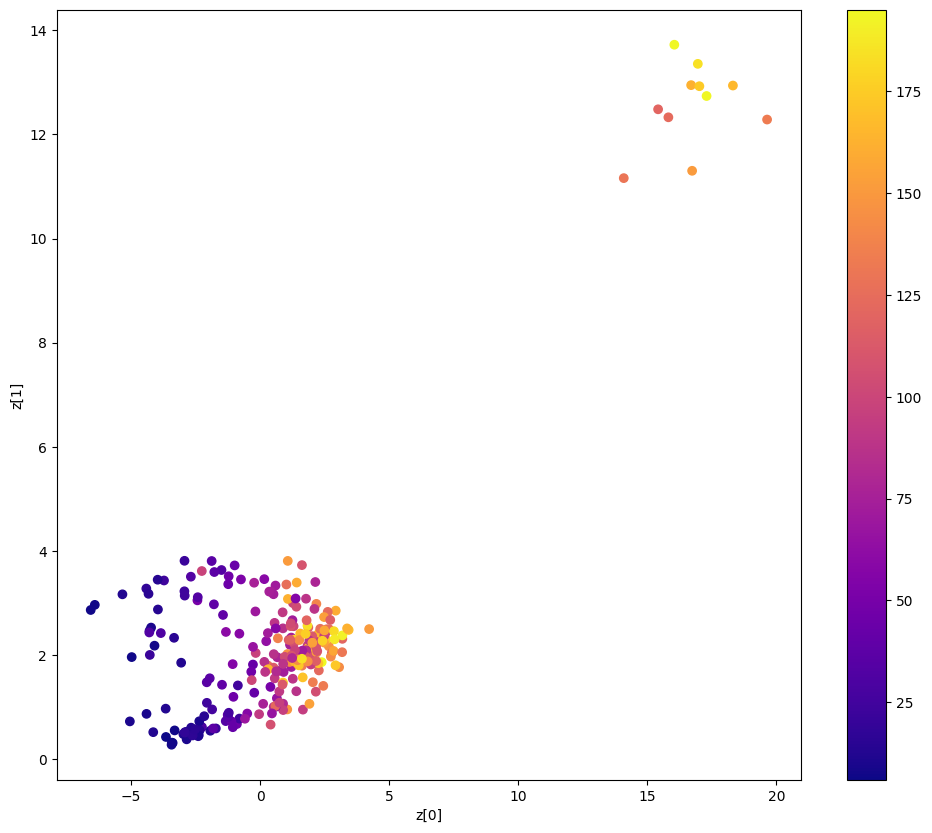

In [17]:
outputs_train = trained_model.predict(data["x_train"])
plot_latent_space(outputs_train['z'], data["y_train"])

plot_latent_space(outputs['z'], data["y_test"])

**TAREAS**
- Completar los TO-DOs
    - Crear un regresor simple con una capa densa y otra capa con 1 neurona para predecir la RUL
    - Añadir el error del regresor
- Documentar las métricas y gráficas obtenidas